In [1]:
import pandas as pd
import re
import time
from PIL import Image
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np


In [2]:
delta = pd.read_csv("delta_airlines.csv")
american = pd.read_csv("american_airlines.csv")

In [3]:
delta.head()

UserScreenName          UserName                      Date  \
0  Occupy Democrats  @OccupyDemocrats  2022-02-05T00:02:59.000Z   
1          ABC News              @ABC  2022-02-05T11:54:02.000Z   
2          NBC News          @NBCNews  2022-02-05T01:17:06.000Z   
3        #TuckFrump  @realTuckFrumper  2022-02-05T20:20:42.000Z   
4           Tommy G   @Tommygreturns2  2022-02-05T15:11:02.000Z   

                                                Text  \
0  Occupy Democrats\n@OccupyDemocrats\n·\n4 Feb 2022   
1                      ABC News\n@ABC\n·\n5 Feb 2022   
2                  NBC News\n@NBCNews\n·\n4 Feb 2022   
3        #TuckFrump\n@realTuckFrumper\n·\n5 Feb 2022   
4            Tommy G\n@Tommygreturns2\n·\n5 Feb 2022   

                                       Embedded_text Emojis Comments  Likes  \
0  BREAKING: Delta Airlines demands that the Just...    NaN    1,789  19.8K   
1  After the worst year in history for unruly air...    NaN       49     89   
2  Two unruly passengers were ejected from a Delt...    NaN       44     49   
3  Delta Airlines Asks DOJ to Put Unruly Passenge...    NaN        2     36   
4  Also, never fly Delta Airlines\n\nEver\nOccupy...    NaN      NaN      3   

  Retweets                                         Image link  \
0    73.5K                                                 []   
1      761  ['https://pbs.twimg.com/card_img/1622433239825...   
2      183  ['https://pbs.twimg.com/card_img/1620350519972...   
3      116  ['https://pbs.twimg.com/card_img/1621063670473...   
4       18  ['https://pbs.twimg.com/profile_images/1570121...   

                                           Tweet URL  
0  https://twitter.com/OccupyDemocrats/status/148...  
1  https://twitter.com/ABC/status/148993031082133...  
2  https://twitter.com/NBCNews/status/14897700204...  
3  https://twitter.com/realTuckFrumper/status/149...  
4  https://twitter.com/Tommygreturns2/status/1489...

## Drop columns

In [4]:
delta = delta.drop(columns = ['UserScreenName', 'UserName', 'Text', 'Emojis', 'Image link', 'Tweet URL'])
american = american.drop(columns = ['UserScreenName', 'UserName', 'Text', 'Emojis', 'Image link', 'Tweet URL'])

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the NLTK VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a single tweet
def get_sentiment(tweet):
    # Use the NLTK VADER sentiment analyzer to get a sentiment score for the tweet
    sentiment = sia.polarity_scores(tweet)['compound']
    
    # Classify the tweet as positive, negative, or neutral based on the sentiment score
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kushal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
american['Sentiment'] = american['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines:', len(american[american['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines:', len(american[american['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines:', len(american[american['Sentiment'] == 'neutral']))


Number of positive tweets for american airlines: 7782
Number of negative tweets for american airlines: 6374
Number of neutral tweets for american airlines: 4246


In [74]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
delta['Sentiment'] = delta['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for Delta airlines:', len(delta[delta['Sentiment'] == 'positive']))
print('Number of negative tweets for Delta airlines:', len(delta[delta['Sentiment'] == 'negative']))
print('Number of neutral tweets for Delta airlines:', len(delta[delta['Sentiment'] == 'neutral']))


Number of positive tweets for Delta airlines: 8986
Number of negative tweets for Delta airlines: 6331
Number of neutral tweets for Delta airlines: 3162


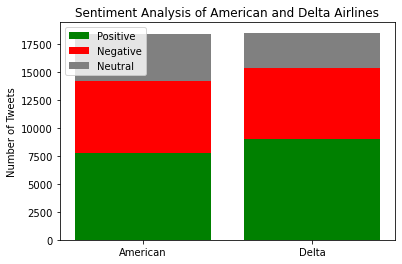

In [75]:
import matplotlib.pyplot as plt

# Get the number of positive, negative, and neutral tweets for American airlines
american_positive = len(american[american['Sentiment'] == 'positive'])
american_negative = len(american[american['Sentiment'] == 'negative'])
american_neutral = len(american[american['Sentiment'] == 'neutral'])

# Get the number of positive, negative, and neutral tweets for Delta airlines
delta_positive = len(delta[delta['Sentiment'] == 'positive'])
delta_negative = len(delta[delta['Sentiment'] == 'negative'])
delta_neutral = len(delta[delta['Sentiment'] == 'neutral'])

# Set up the data for the bar graph
positive = [american_positive, delta_positive]
negative = [american_negative, delta_negative]
neutral = [american_neutral, delta_neutral]
x_labels = ['American', 'Delta']

# Set up the bar graph
fig, ax = plt.subplots()
ax.bar(x_labels, positive, label='Positive', color='green')
ax.bar(x_labels, negative, bottom=positive, label='Negative', color='red')
ax.bar(x_labels, neutral, bottom=[i+j for i,j in zip(positive, negative)], label='Neutral', color='gray')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Analysis of American and Delta Airlines')
ax.legend()

# Show the bar graph
plt.show()


In [76]:
from PIL import Image
import os
# Set the path to the image file
image_path = os.path.join(os.getcwd(), "thumbsup.jpeg")
mask = np.array(Image.open("thumbsup.jpeg"))

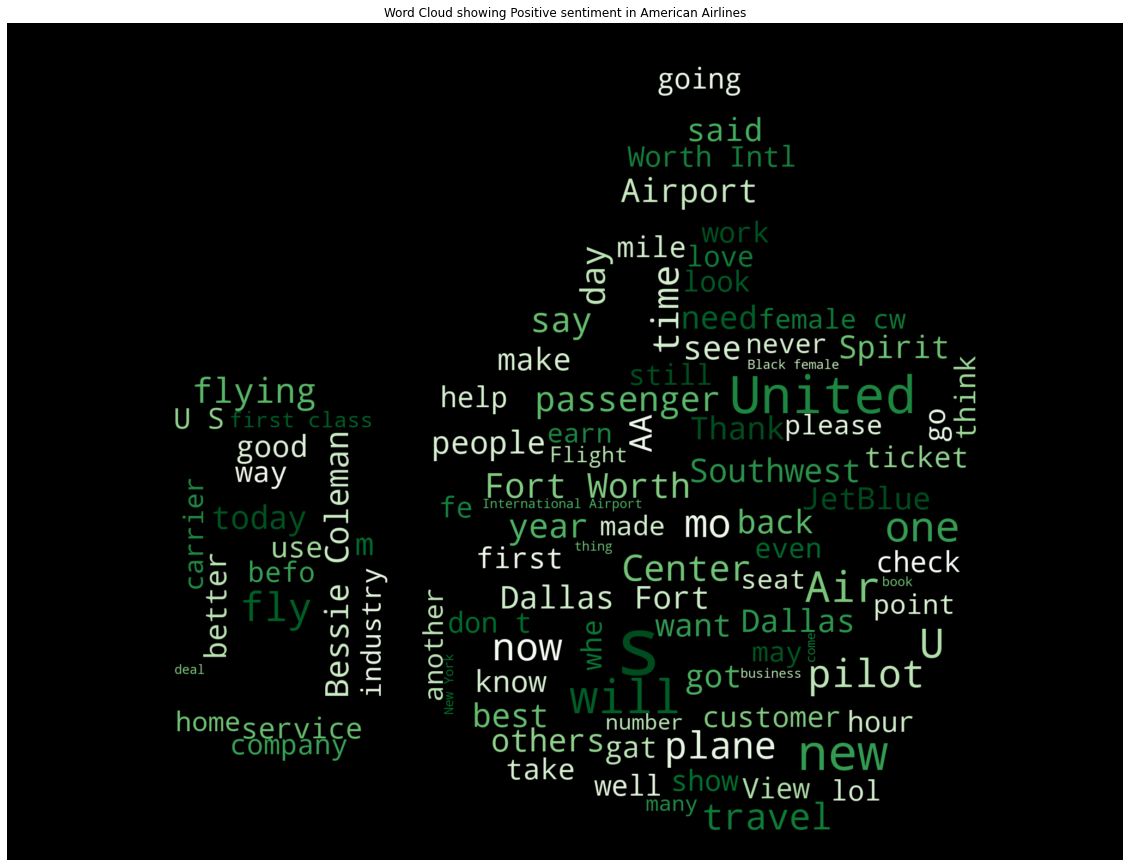

In [77]:
# Load text data and mask image
txt = ' '.join(american[american['Sentiment'] == 'positive']['Embedded_text'].tolist())
mask = np.array(Image.open(image_path))

# Define a list of words to remove
remove_words = ['American', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Remove the words from the american_text string
for word in remove_words:
    txt = txt.replace(word, '')

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Greens', mask=mask,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=100).generate(txt)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Positive sentiment in American Airlines")
plt.axis("off")
plt.show()


In [78]:
#below is 2-word wordcloud. Its bad because it has stopwords

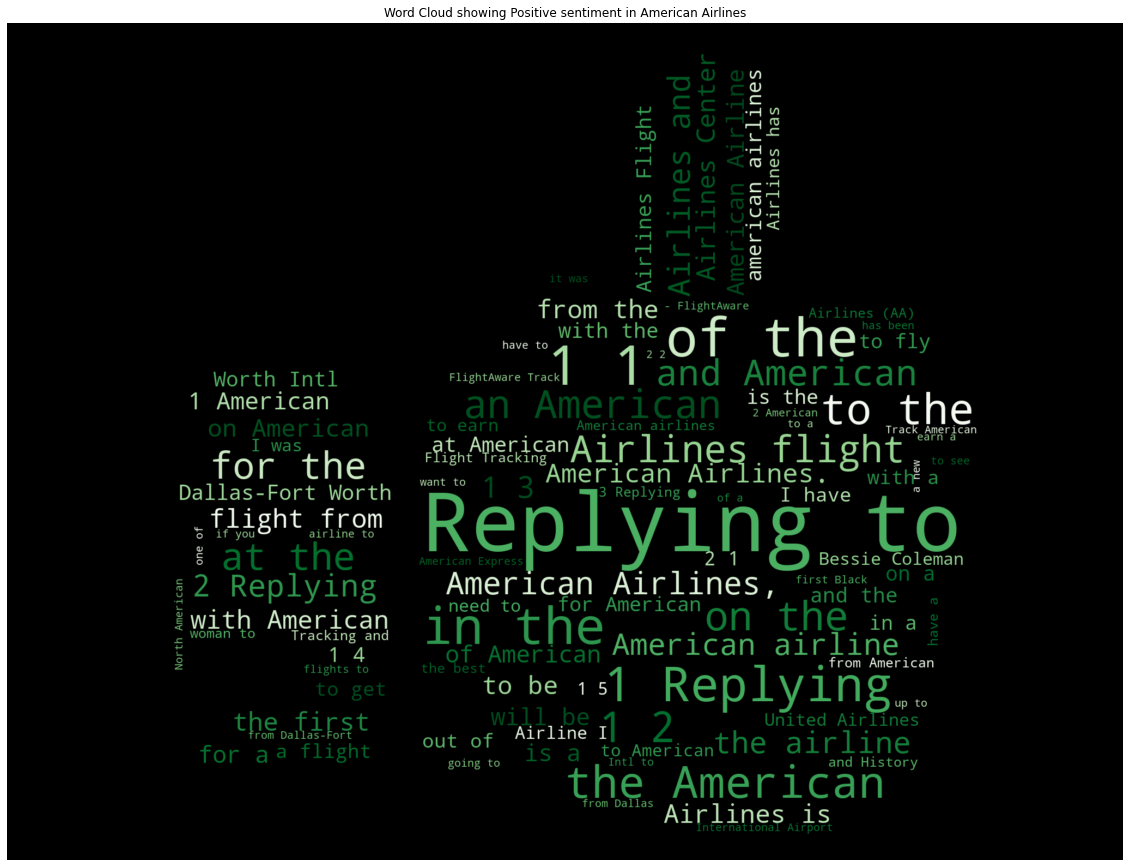

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the text to generate the word cloud from
txt = ' '.join(american[american['Sentiment'] == 'positive']['Embedded_text'].tolist())

# Define a list of words to remove from the text (if any)
remove_words = ['American Airlines', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Define a mask (if any)
mask = np.array(Image.open("thumbsup.jpeg"))

# Create a dictionary to store the word frequency counts
word_freq = {}

# Split the text into words and count the frequency of each word (including 2-word phrases)
words = txt.split()
for i in range(len(words) - 1):
    word = words[i] + " " + words[i+1]
    if word not in remove_words:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Greens', mask=mask,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=100).generate_from_frequencies(word_freq)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Positive sentiment in American Airlines")
plt.axis("off")
plt.show()


In [80]:
#after removing stopwords from above

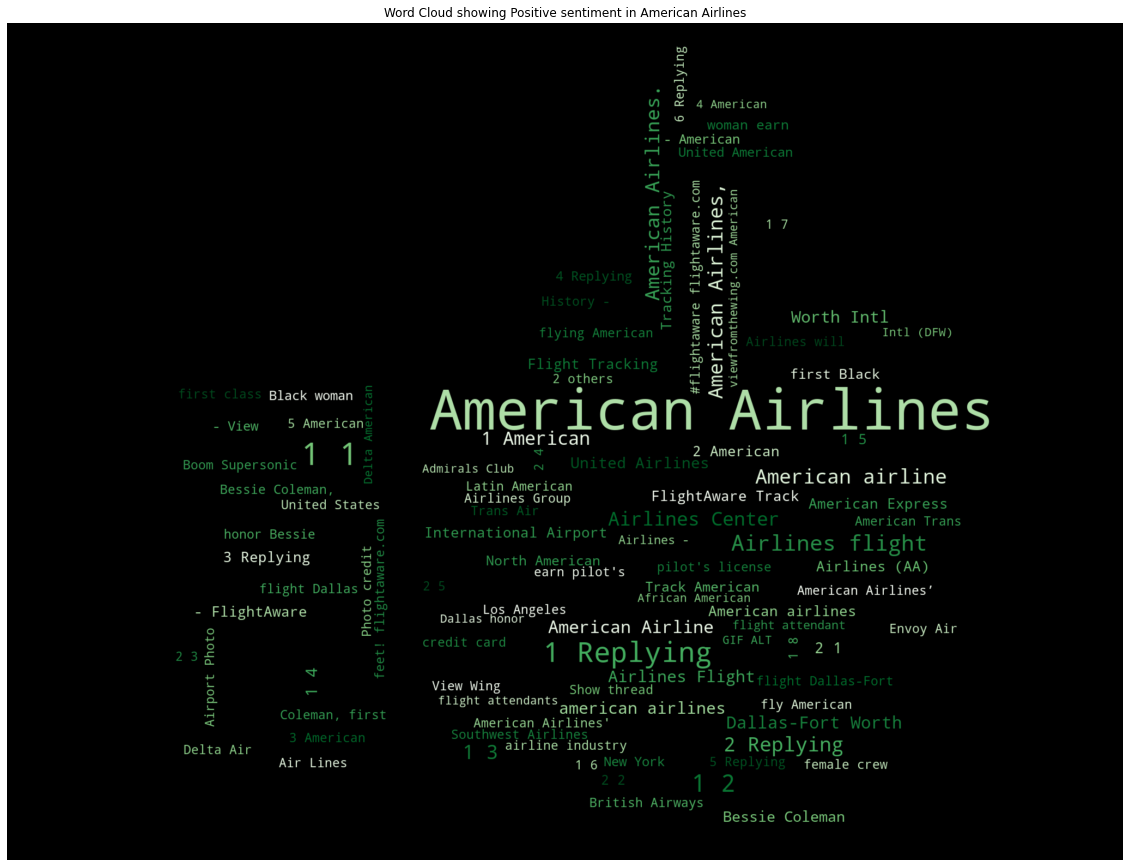

In [81]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the text to generate the word cloud from
txt = ' '.join(american[american['Sentiment'] == 'positive']['Embedded_text'].tolist())


# Define a mask (if any)
mask = np.array(Image.open("thumbsup.jpeg"))

# Remove stopwords from the text
stopwords = set(STOPWORDS)
txt = ' '.join([word for word in txt.split() if word.lower() not in stopwords])

# Create a dictionary to store the word frequency counts
word_freq = {}

# Split the text into words and count the frequency of each word (including 2-word phrases)
words = txt.split()
for i in range(len(words) - 1):
    word = words[i] + " " + words[i+1]
    if word not in stopwords:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Greens', mask=mask,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=100).generate_from_frequencies(word_freq)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Positive sentiment in American Airlines")
plt.axis("off")
plt.show()


In [84]:
#this code removes stopwords. It removes custom stopwords as well. 

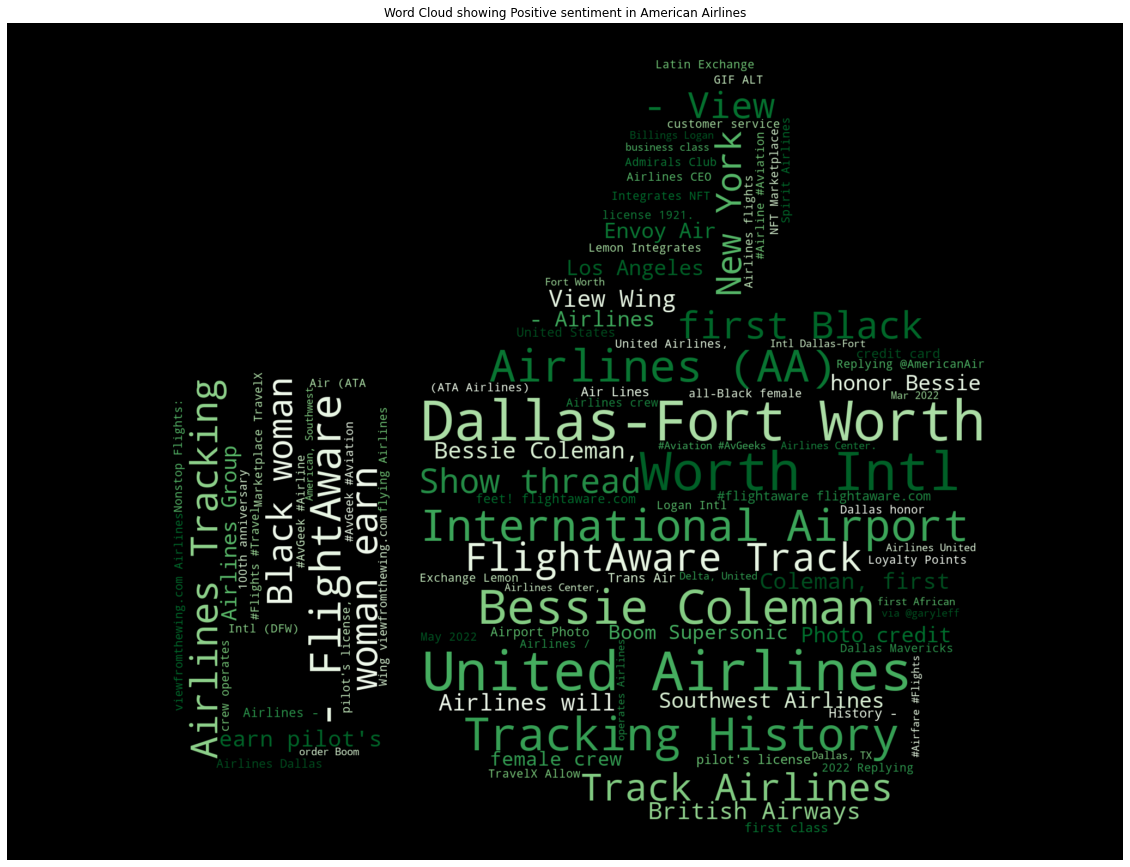

In [83]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the text to generate the word cloud from
txt = ' '.join(american[american['Sentiment'] == 'positive']['Embedded_text'].tolist())


# Define a mask (if any)
mask = np.array(Image.open("thumbsup.jpeg"))

# Remove stopwords and custom words from the text
stopwords = set(STOPWORDS)
custom_stopwords = ['American Airlines', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying', 'Airlines Center', '1','2','3','4','5','6','7','8','9','0']
stopwords.update(custom_stopwords)
txt = ' '.join([word for word in txt.split() if word.lower() not in stopwords])

# Create a dictionary to store the word frequency counts
word_freq = {}

# Split the text into words and count the frequency of each word (including 2-word phrases)
words = txt.split()
for i in range(len(words) - 1):
    word = words[i] + " " + words[i+1]
    if word not in stopwords:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Greens', mask=mask,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=100).generate_from_frequencies(word_freq)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Positive sentiment in American Airlines")
plt.axis("off")
plt.show()


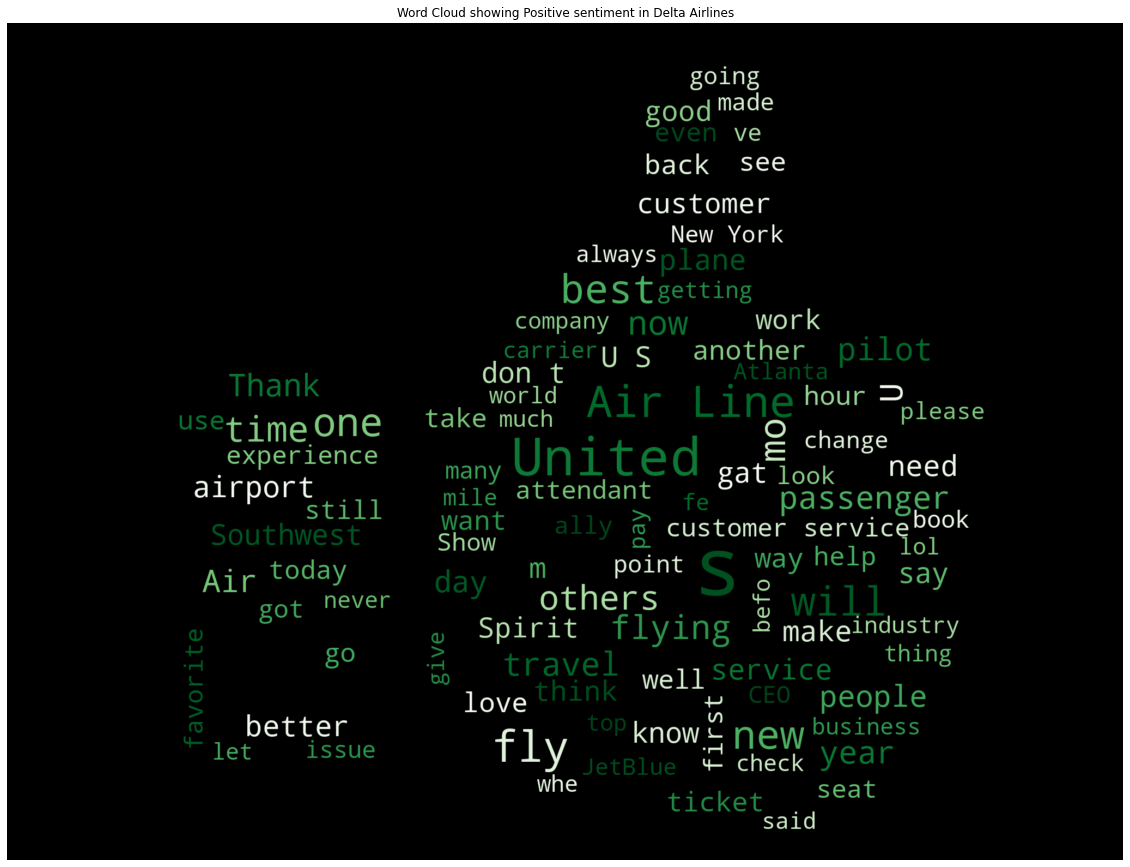

In [16]:
# Load text data and mask image
txt = ' '.join(delta[delta['Sentiment'] == 'positive']['Embedded_text'].tolist())
mask = np.array(Image.open(image_path))

# Define a list of words to remove
remove_words = ['American', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Remove the words from the american_text string
for word in remove_words:
    txt = txt.replace(word, '')

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Greens', mask=mask,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=100).generate(txt)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Positive sentiment in Delta Airlines")
plt.axis("off")
plt.show()


In [17]:
# Set the path to the image file
image_path1 = os.path.join(os.getcwd(), "thumbsdown.jpeg")
mask1 = np.array(Image.open("thumbsdown.jpeg"))

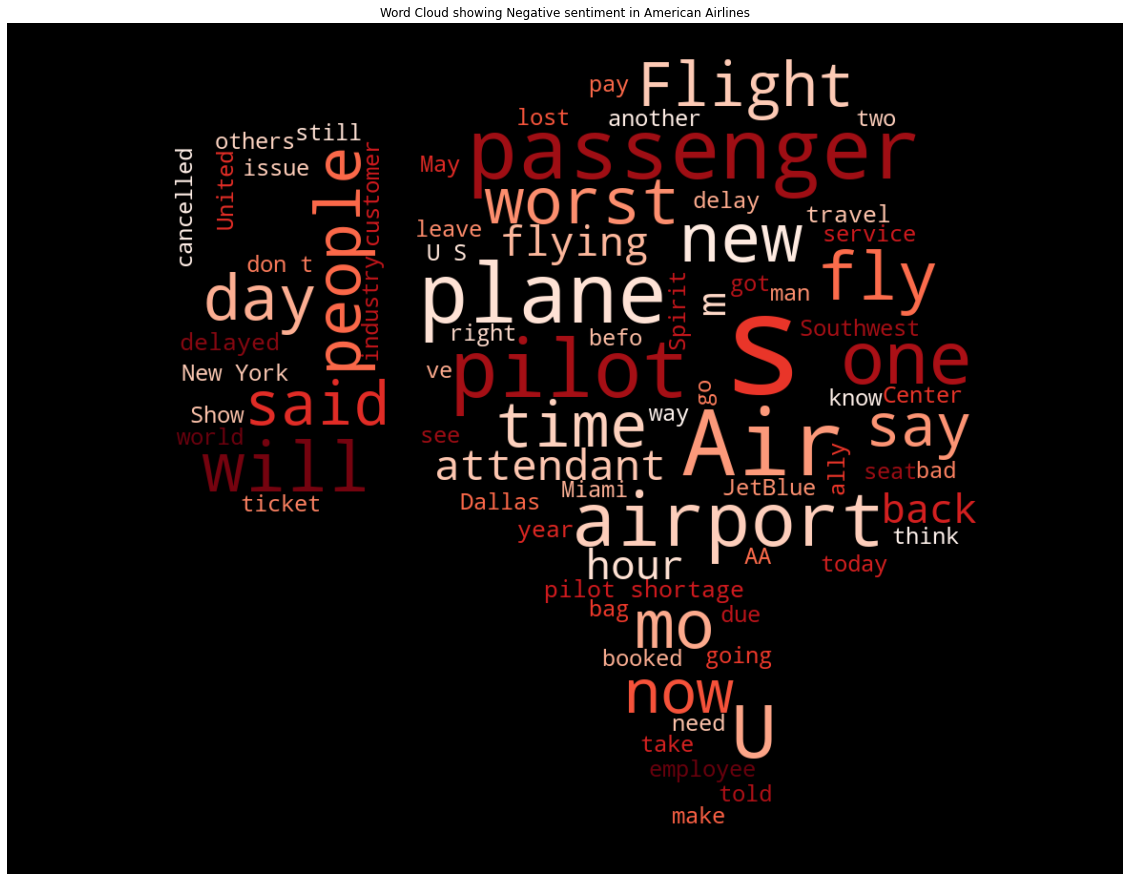

In [18]:
# Load text data and mask image
txt = ' '.join(american[american['Sentiment'] == 'negative']['Embedded_text'].tolist())
mask1 = np.array(Image.open(image_path1))

# Define a list of words to remove
remove_words = ['American', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Remove the words from the american_text string
for word in remove_words:
    txt = txt.replace(word, '')

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Reds', mask=mask1,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=80).generate(txt)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Negative sentiment in American Airlines")
plt.axis("off")
plt.show()


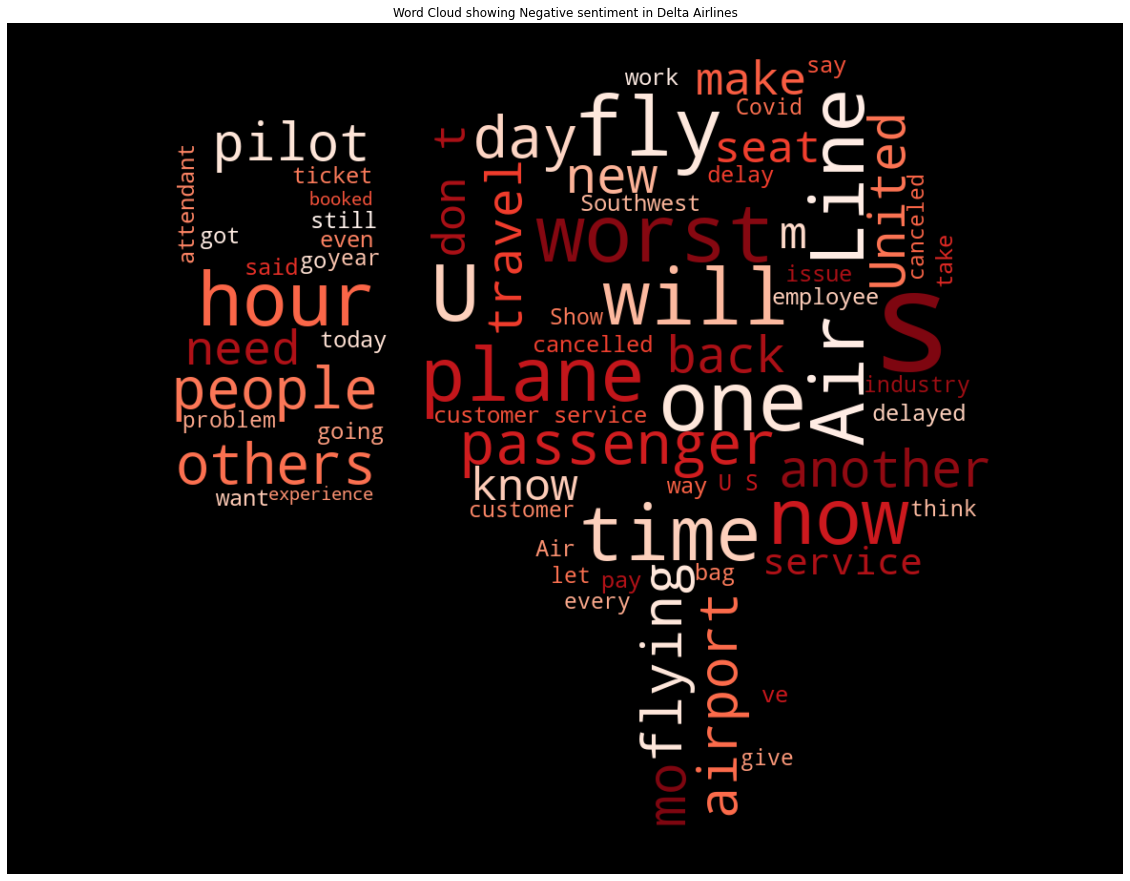

In [19]:
# Load text data and mask image
txt = ' '.join(delta[delta['Sentiment'] == 'negative']['Embedded_text'].tolist())
mask1 = np.array(Image.open(image_path1))

# Define a list of words to remove
remove_words = ['American', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Remove the words from the american_text string
for word in remove_words:
    txt = txt.replace(word, '')

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='Reds', mask=mask1,
                      max_font_size=150, min_font_size=10, width=800, height=800, max_words=70).generate(txt)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing Negative sentiment in Delta Airlines")
plt.axis("off")
plt.show()


In [20]:
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk import wordnet
import nltk
nltk.download('stopwords')

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

def plot_word_frequency(data, sentiment):
    if data == 'american':
        airline_data = american
    elif data == 'delta':
        airline_data = delta
    else:
        print("Invalid argument for 'data'. Please enter 'american' or 'delta'.")
        return
    
    if sentiment == 'positive':
        sentiment_data = airline_data[airline_data['Sentiment'] == 'positive']
    elif sentiment == 'negative':
        sentiment_data = airline_data[airline_data['Sentiment'] == 'negative']
    else:
        print("Invalid argument for 'sentiment'. Please enter 'positive' or 'negative'.")
        return
    
    text = ' '.join(sentiment_data['Embedded_text'].tolist())
    
    # Tokenize the text
    tokenizer = RegexpTokenizer(r'(\w+(?:(?:\'|\’)(?:s|t|m|ve))?)')
    tokens = tokenizer.tokenize(text)
    
    # Create stopword list
    stop_words = set(stopwords.words('english'))
    stop_words.update(['replying', 'com', 'american', 'delta', 'airlines', 'united', 'flight', 'flights', 'airline', 'https', 's', 't', '1', '2', 
                       '3', '4', '5', '6', '7', '8', '9', '10', '11', '2022', 'm', 're'])
    
    # Exclude stopwords from the frequency distribution
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    freq = FreqDist(filtered_tokens)
    
    # Generate frequency distribution and plot the chart
    freq.plot(40)
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kushal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


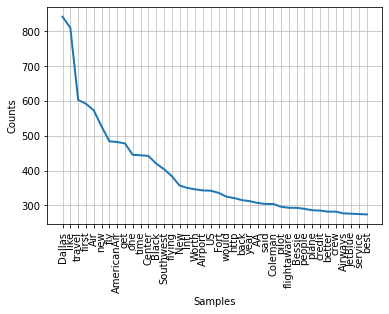

In [21]:
plot_word_frequency('american', 'positive')

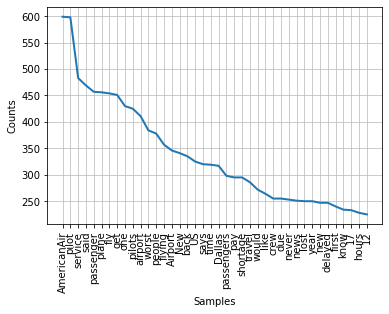

In [22]:
plot_word_frequency('american', 'negative')

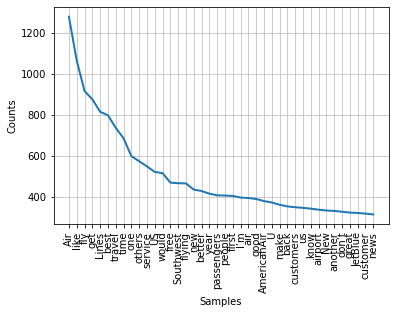

In [23]:
plot_word_frequency('delta', 'positive')

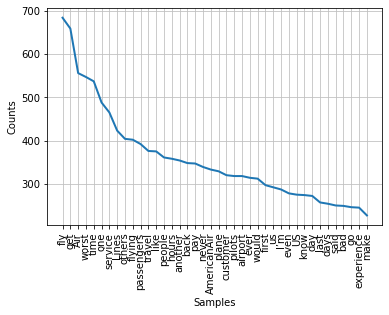

In [24]:
plot_word_frequency('delta', 'negative')

# Compare month wise

In [25]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [26]:
american['created_at'] = pd.to_datetime(american['Date'])
delta['created_at'] = pd.to_datetime(delta['Date'])

american['month'] = american['created_at'].dt.month
delta['month'] = delta['created_at'].dt.month


In [27]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'


In [28]:
american['sentiment'] = american['Embedded_text'].apply(get_sentiment)
delta['sentiment'] = delta['Embedded_text'].apply(get_sentiment)


In [29]:
#Group the tweets by month and sentiment and count the number of tweets in each group
american_sentiment_count = american.groupby(['month', 'sentiment'])['Embedded_text'].count().reset_index()
delta_sentiment_count = delta.groupby(['month', 'sentiment'])['Embedded_text'].count().reset_index()


In [30]:
#Pivot the tables to make the sentiment values as columns
american_sentiment_count = american_sentiment_count.pivot(index='month', columns='sentiment', values='Embedded_text').reset_index()
delta_sentiment_count = delta_sentiment_count.pivot(index='month', columns='sentiment', values='Embedded_text').reset_index()


In [31]:
#Merge the tables on the month column
merged_sentiment_count = pd.merge(american_sentiment_count, delta_sentiment_count, on='month', suffixes=('_american', '_delta'))


<function matplotlib.pyplot.show(close=None, block=None)>

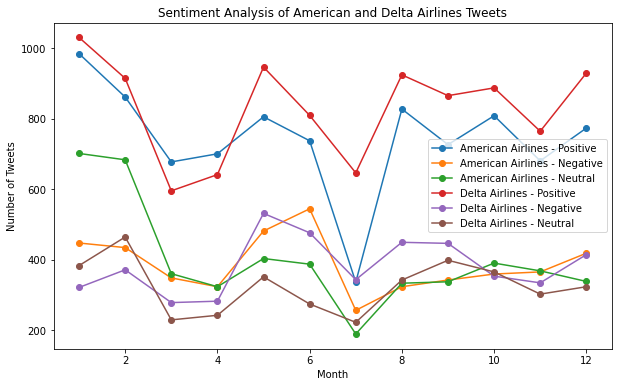

In [32]:
#Plot a line graph to show the sentiment trend over time for both airlines
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(merged_sentiment_count['month'], merged_sentiment_count['positive_american'], label='American Airlines - Positive', marker='o')
ax.plot(merged_sentiment_count['month'], merged_sentiment_count['negative_american'], label='American Airlines - Negative', marker='o')
ax.plot(merged_sentiment_count['month'], merged_sentiment_count['neutral_american'], label='American Airlines - Neutral', marker='o')
ax.plot(merged_sentiment_count['month'], merged_sentiment_count['positive_delta'], label='Delta Airlines - Positive', marker='o')
ax.plot(merged_sentiment_count['month'], merged_sentiment_count['negative_delta'], label='Delta Airlines - Negative', marker='o')
ax.plot(merged_sentiment_count['month'], merged_sentiment_count['neutral_delta'], label='Delta Airlines - Neutral', marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Analysis of American and Delta Airlines Tweets')
ax.legend()
plt.show


## Select holiday data 

In [33]:
def date_select(data, col, start_date, end_date):
    data[col] = data[col].str[0:10]
    data[col] = pd.to_datetime(data[col])
    data.set_index(col, inplace=True)
    data = data.loc[start_date:end_date]
    return data

In [34]:
holiday_start_date = '2022-11-24'
holiday_end_date = '2022-12-31'

american_holiday = date_select(american, 'Date', holiday_start_date, holiday_end_date)
delta_holiday = date_select(delta, 'Date', holiday_start_date, holiday_end_date)

#american_holiday.to_csv('american_holiday.csv')
#delta_holiday.to_csv('delta_holiday.csv')

In [35]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the NLTK VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a single tweet
def get_sentiment(tweet):
    # Use the NLTK VADER sentiment analyzer to get a sentiment score for the tweet
    sentiment = sia.polarity_scores(tweet)['compound']
    
    # Classify the tweet as positive, negative, or neutral based on the sentiment score
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
american_holiday['Sentiment'] = american_holiday['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines in Holiday period:', len(american_holiday[american_holiday['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines in Holiday period:', len(american_holiday[american_holiday['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines in Holiday period:', len(american_holiday[american_holiday['Sentiment'] == 'neutral']))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kushal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Number of positive tweets for american airlines in Holiday period: 835
Number of negative tweets for american airlines in Holiday period: 635
Number of neutral tweets for american airlines in Holiday period: 369


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/2559553372.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_holiday['Sentiment'] = american_holiday['Embedded_text'].apply(get_sentiment)


In [36]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
delta_holiday['Sentiment'] = delta_holiday['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for delta airlines in Holiday period:', len(delta_holiday[delta_holiday['Sentiment'] == 'positive']))
print('Number of negative tweets for delta airlines in Holiday period:', len(delta_holiday[delta_holiday['Sentiment'] == 'negative']))
print('Number of neutral tweets for delta airlines in Holiday period:', len(delta_holiday[delta_holiday['Sentiment'] == 'neutral']))


Number of positive tweets for delta airlines in Holiday period: 1050
Number of negative tweets for delta airlines in Holiday period: 644
Number of neutral tweets for delta airlines in Holiday period: 298


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/3616139579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_holiday['Sentiment'] = delta_holiday['Embedded_text'].apply(get_sentiment)


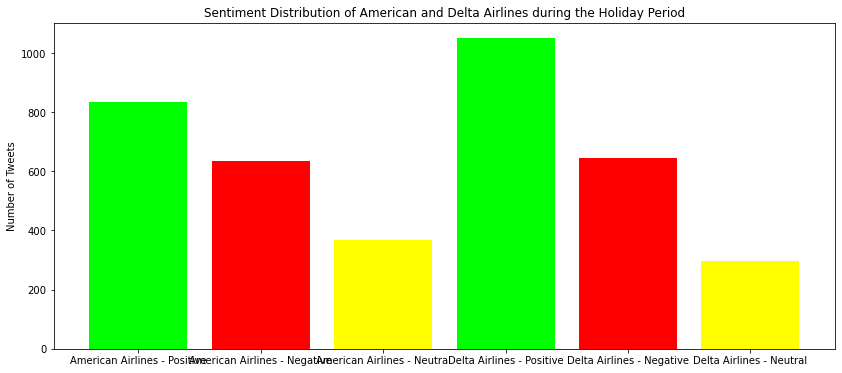

In [37]:
import matplotlib.pyplot as plt

# Calculate the number of tweets for each sentiment for American Airlines
american_sentiment_count = american_holiday['Sentiment'].value_counts()

# Calculate the number of tweets for each sentiment for Delta Airlines
delta_sentiment_count = delta_holiday['Sentiment'].value_counts()

# Create a bar chart comparing the sentiment distribution of American and Delta airlines during the holiday period
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(['American Airlines - Positive', 'American Airlines - Negative', 'American Airlines - Neutral',
        'Delta Airlines - Positive', 'Delta Airlines - Negative', 'Delta Airlines - Neutral'],
       [american_sentiment_count['positive'], american_sentiment_count['negative'], american_sentiment_count['neutral'],
        delta_sentiment_count['positive'], delta_sentiment_count['negative'], delta_sentiment_count['neutral']],
       color=['#00FF00', '#FF0000', '#FFFF00', '#00FF00', '#FF0000', '#FFFF00'])
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Distribution of American and Delta Airlines during the Holiday Period')
plt.show()


In [38]:
# Set the path to the image file
image_path2 = os.path.join(os.getcwd(), "Aeroplane.png")
mask2 = np.array(Image.open("Aeroplane.png"))

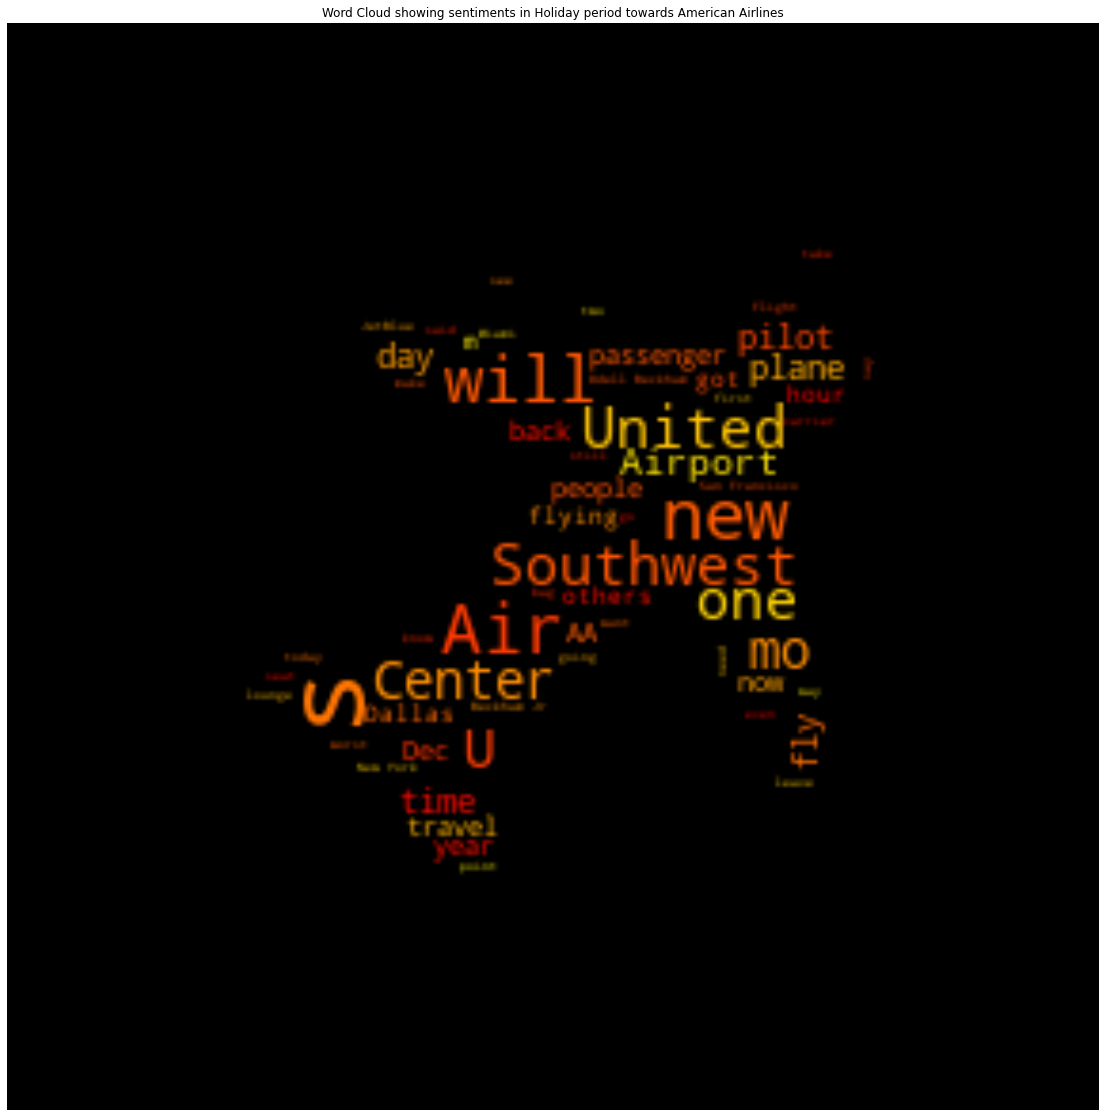

In [39]:
# Load text data and mask image
txt = ' '.join(american_holiday['Embedded_text'].tolist())
mask2 = np.array(Image.open(image_path2))

# Define a list of words to remove
remove_words = ['American', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Remove the words from the american_text string
for word in remove_words:
    txt = txt.replace(word, '')

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='autumn', mask=mask2,
                      max_font_size=30, min_font_size=3, width=80, height=50, max_words=150).generate(txt)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing sentiments in Holiday period towards American Airlines")
plt.axis("off")
plt.show()

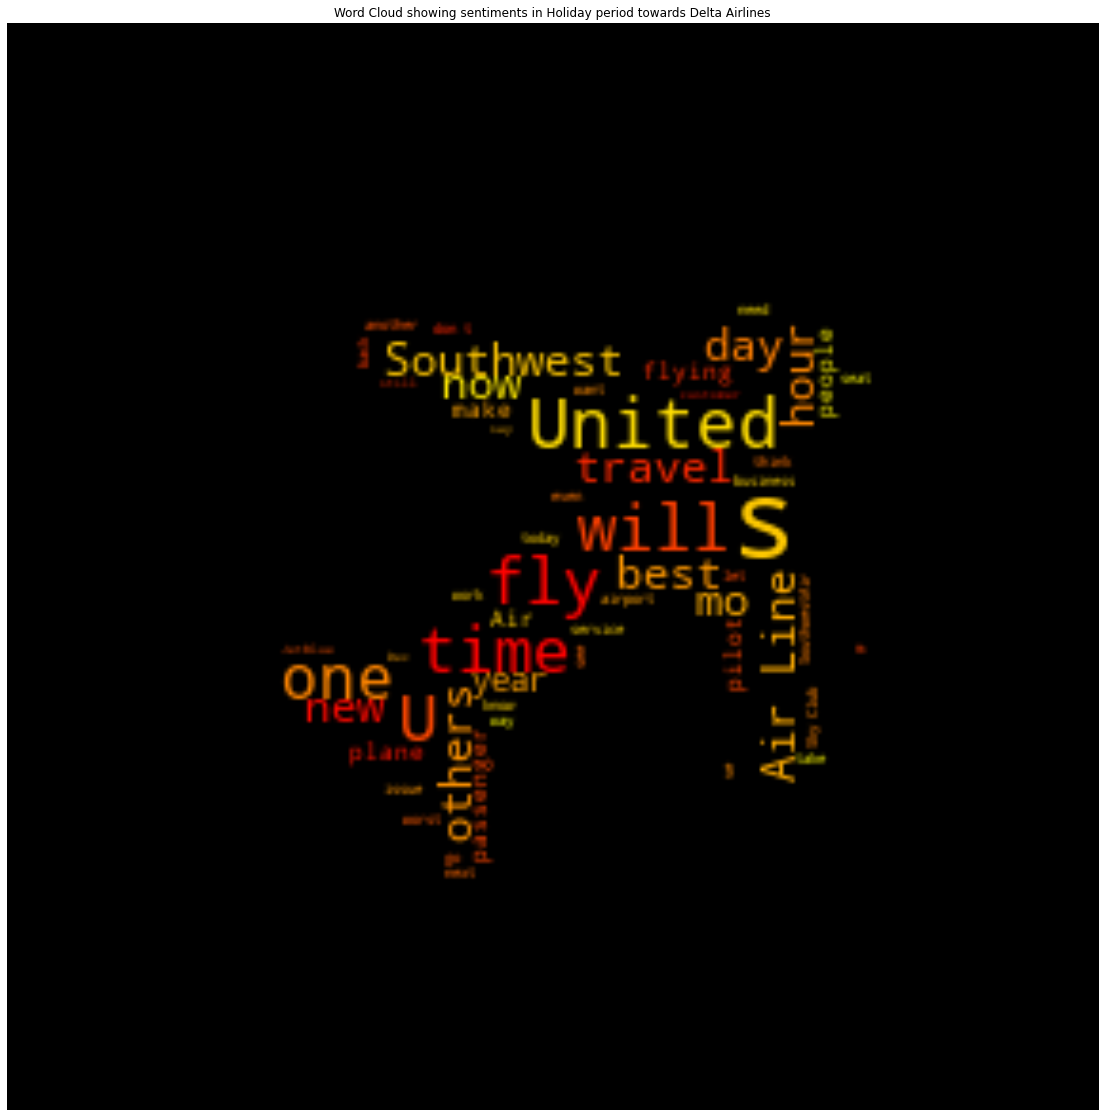

In [40]:
# Load text data and mask image
txt = ' '.join(delta_holiday['Embedded_text'].tolist())
mask2 = np.array(Image.open(image_path2))

# Define a list of words to remove
remove_words = ['American', 'Airlines','american', 'flight', 'airline', 'delta', 'Delta', 'Airline', 'https', 're', 'Replying']

# Remove the words from the american_text string
for word in remove_words:
    txt = txt.replace(word, '')

# Create word cloud
wordcloud = WordCloud(background_color="black", colormap='autumn', mask=mask2,
                      max_font_size=30, min_font_size=3, width=80, height=50, max_words=150).generate(txt)

# Display the image
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud showing sentiments in Holiday period towards Delta Airlines")
plt.axis("off")
plt.show()

## War, Queen, Travel

In [41]:
war = r'(\brussia|ukraine|\boil price)'
queen = r'(\bqueen|\belizabeth|queen of uk|queen of england)'
travel = r'(covid|corona virus|revenge travel)'


def process_str(text):
    text = re.sub(r'@[\d\w]+', '', text)
    return text


def extract(text, pattern):
    has = 0
    text = text.lower()
    match = re.search(pattern, text)
    if match:
        return True
        
    return False


def extract_from_df(df, lst):
    idx = []
    for i in range(len(df)):
        if isinstance(df['Embedded_text'].iloc[i], str):
            flag = extract(process_str(df['Embedded_text'].iloc[i]), lst) 
            if flag:
                idx.append(i)
    return idx


In [42]:
#delta

war_idx = extract_from_df(delta, war)
queen_idx = extract_from_df(delta, queen)
travel_idx = extract_from_df(delta, travel)

delta_war = delta.iloc[war_idx]
delta_queen = delta.iloc[queen_idx]
delta_travel = delta.iloc[travel_idx]

#delta_war.to_csv("delta_war.csv")
#delta_queen.to_csv("delta_queen.csv")
#delta_travel.to_csv("delta_travel.csv")

In [43]:
#american

war_idx = extract_from_df(american, war)
queen_idx = extract_from_df(american, queen)
travel_idx = extract_from_df(american, travel)

american_war = american.iloc[war_idx]
american_queen = american.iloc[queen_idx]
american_travel = american.iloc[travel_idx]

#american_war.to_csv("american_war.csv")
#american_queen.to_csv("american_queen.csv")
#american_travel.to_csv("american_travel.csv")

# war sentiments

In [44]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
american_war['Sentiment'] = american_war['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines in war period:', len(american_war[american_war['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines in war period:', len(american_war[american_war['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines in war period:', len(american_war[american_war['Sentiment'] == 'neutral']))


Number of positive tweets for american airlines in war period: 63
Number of negative tweets for american airlines in war period: 81
Number of neutral tweets for american airlines in war period: 19


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/434795068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_war['Sentiment'] = american_war['Embedded_text'].apply(get_sentiment)


In [45]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
delta_war['Sentiment'] = delta_war['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines in war period:', len(delta_war[delta_war['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines in war period:', len(delta_war[delta_war['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines in war period:', len(delta_war[delta_war['Sentiment'] == 'neutral']))


Number of positive tweets for american airlines in war period: 71
Number of negative tweets for american airlines in war period: 119
Number of neutral tweets for american airlines in war period: 34


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/2883689390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_war['Sentiment'] = delta_war['Embedded_text'].apply(get_sentiment)


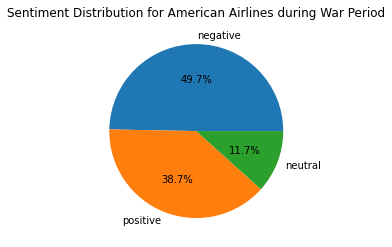

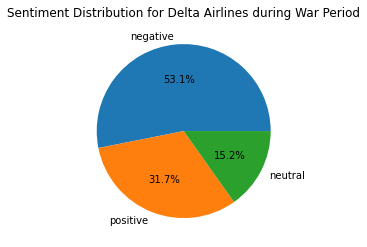

In [46]:
import matplotlib.pyplot as plt

# Create pie chart for American Airlines during war period
american_war_sentiment_counts = american_war['Sentiment'].value_counts()
plt.pie(american_war_sentiment_counts, labels=american_war_sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution for American Airlines during War Period')
plt.show()

# Create pie chart for Delta Airlines during war period
delta_war_sentiment_counts = delta_war['Sentiment'].value_counts()
plt.pie(delta_war_sentiment_counts, labels=delta_war_sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution for Delta Airlines during War Period')
plt.show()


In [47]:
# Define a function to generate a word cloud from a text
def generate_wordcloud(text,title):
    # Create a WordCloud object with the specified parameters
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    
    # Display the generated image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

In [48]:
# Get the text from the 'Embedded_text' column of each DataFrame
american_war_text = ' '.join(american_war['Embedded_text'].tolist())
delta_war_text = ' '.join(delta_war['Embedded_text'].tolist())

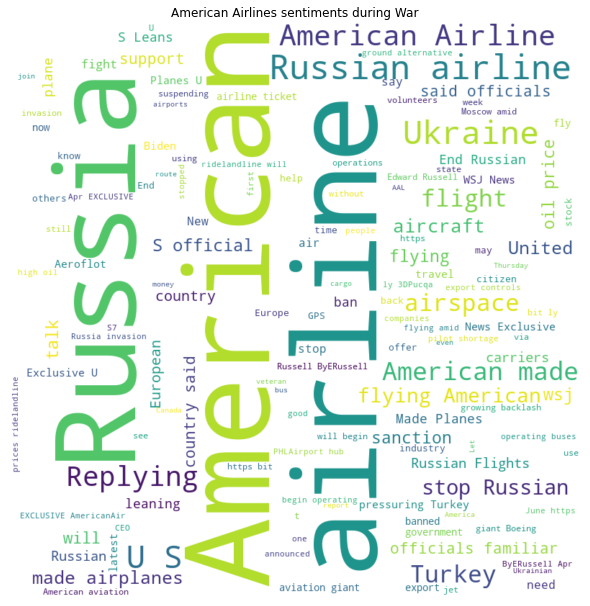

In [49]:
# Define a list of words to remove
#remove_words = ['American', 'Airlines', 'flight', 'airline', 'delta', 'Delta', 'Airline','Replying']

# Remove the words from the american_text string
#for word in remove_words:
#    american_holiday_text = american_holiday_text.replace(word, '')

# Generate the word cloud for American airlines
generate_wordcloud(american_war_text, 'American Airlines sentiments during War' )

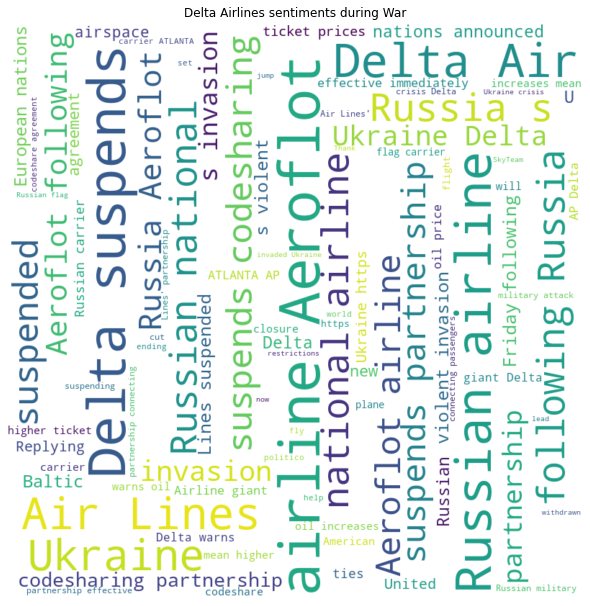

In [50]:
generate_wordcloud(delta_war_text,'Delta Airlines sentiments during War')

# Sentiments related to Travel (covid)

In [51]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
american_travel['Sentiment'] = american_travel['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines:', len(american_travel[american_travel['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines:', len(american_travel[american_travel['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines:', len(american_travel[american_travel['Sentiment'] == 'neutral']))


Number of positive tweets for american airlines: 96
Number of negative tweets for american airlines: 132
Number of neutral tweets for american airlines: 24


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/2579942546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_travel['Sentiment'] = american_travel['Embedded_text'].apply(get_sentiment)


In [52]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
delta_travel['Sentiment'] = delta_travel['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines:', len(delta_travel[delta_travel['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines:', len(delta_travel[delta_travel['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines:', len(delta_travel[delta_travel['Sentiment'] == 'neutral']))


Number of positive tweets for american airlines: 239
Number of negative tweets for american airlines: 223
Number of neutral tweets for american airlines: 51


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/2458543365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_travel['Sentiment'] = delta_travel['Embedded_text'].apply(get_sentiment)


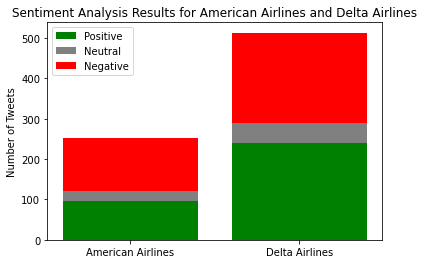

In [53]:
import matplotlib.pyplot as plt

# Group the tweets by airline and sentiment
american_sentiments = american_travel.groupby('Sentiment').size()
delta_sentiments = delta_travel.groupby('Sentiment').size()

# Create a stacked bar chart
fig, ax = plt.subplots()
ax.bar(['American Airlines'], american_sentiments['positive'], color='green', label='Positive')
ax.bar(['American Airlines'], american_sentiments['neutral'], bottom=american_sentiments['positive'], color='gray', label='Neutral')
ax.bar(['American Airlines'], american_sentiments['negative'], bottom=american_sentiments['positive']+american_sentiments['neutral'], color='red', label='Negative')
ax.bar(['Delta Airlines'], delta_sentiments['positive'], color='green')
ax.bar(['Delta Airlines'], delta_sentiments['neutral'], bottom=delta_sentiments['positive'], color='gray')
ax.bar(['Delta Airlines'], delta_sentiments['negative'], bottom=delta_sentiments['positive']+delta_sentiments['neutral'], color='red')
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Analysis Results for American Airlines and Delta Airlines')
ax.legend(loc='upper left')
plt.show()


In [54]:
# Get the text from the 'Embedded_text' column of each DataFrame
american_travel_text = ' '.join(american_travel['Embedded_text'].tolist())
delta_travel_text = ' '.join(delta_travel['Embedded_text'].tolist())

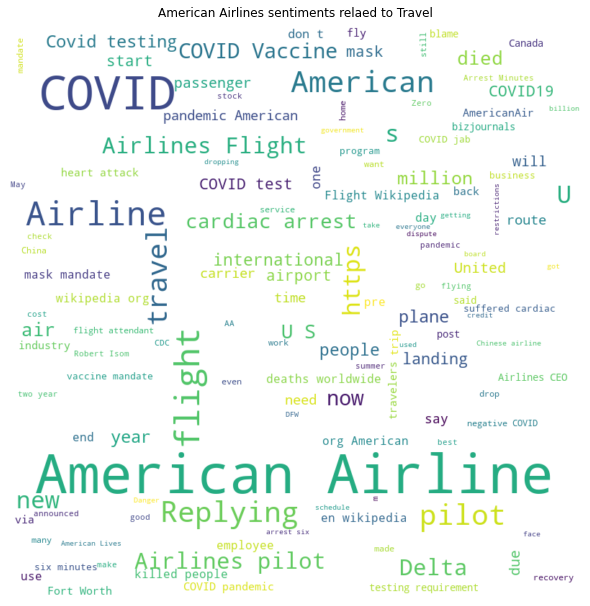

In [55]:
# Define a list of words to remove
#remove_words = ['American', 'Airlines', 'flight', 'airline', 'delta', 'Delta', 'Airline','Replying']

# Remove the words from the american_text string
#for word in remove_words:
#    american_holiday_text = american_holiday_text.replace(word, '')

# Generate the word cloud for American airlines
generate_wordcloud(american_travel_text,'American Airlines sentiments relaed to Travel')

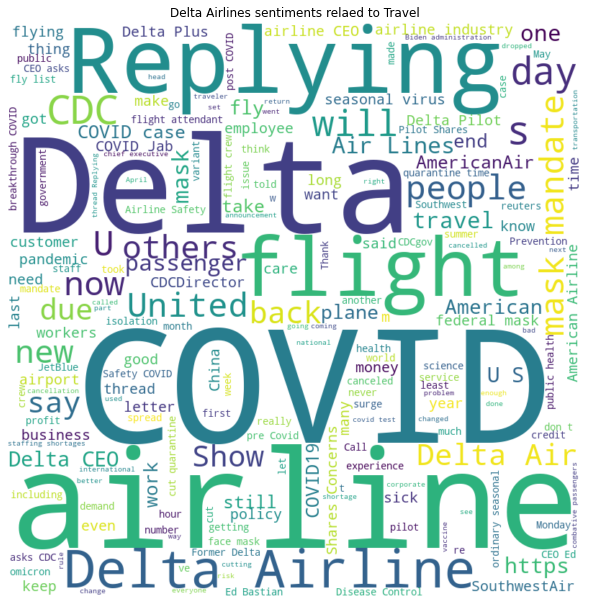

In [56]:
generate_wordcloud(delta_travel_text,'Delta Airlines sentiments relaed to Travel')

# Sentiments related to referral programs

In [57]:
bonus = r'(\breward|referral|\sky miles|aa advantage)'

In [58]:
bonus_idx = extract_from_df(american, bonus)
bonus_idx = extract_from_df(delta, bonus)

In [59]:
american_bonus = american.iloc[bonus_idx]
delta_bonus = delta.iloc[bonus_idx]

In [60]:
american_bonus.to_csv("american_bonus.csv")
delta_bonus.to_csv("delta_bonus.csv")

In [61]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
american_bonus['Sentiment'] = american_bonus['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for american airlines in realtion to referral programs:', len(american_bonus[american_bonus['Sentiment'] == 'positive']))
print('Number of negative tweets for american airlines in realtion to referral programs:', len(american_bonus[american_bonus['Sentiment'] == 'negative']))
print('Number of neutral tweets for american airlines in realtion to referral programs:', len(american_bonus[american_bonus['Sentiment'] == 'neutral']))


Number of positive tweets for american airlines in realtion to referral programs: 50
Number of negative tweets for american airlines in realtion to referral programs: 29
Number of neutral tweets for american airlines in realtion to referral programs: 21


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/1856093634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american_bonus['Sentiment'] = american_bonus['Embedded_text'].apply(get_sentiment)


In [62]:
# Apply the get_sentiment function to each tweet in the DataFrame and create a new column for the sentiment classification
delta_bonus['Sentiment'] = delta_bonus['Embedded_text'].apply(get_sentiment)

# Output the number of positive, negative, and neutral tweets
print('Number of positive tweets for delta airlines in realtion to referral programs:', len(delta_bonus[delta_bonus['Sentiment'] == 'positive']))
print('Number of negative tweets for delta airlines in realtion to referral programs:', len(delta_bonus[delta_bonus['Sentiment'] == 'negative']))
print('Number of neutral tweets for delta airlines in realtion to referral programs:', len(delta_bonus[delta_bonus['Sentiment'] == 'neutral']))


Number of positive tweets for delta airlines in realtion to referral programs: 81
Number of negative tweets for delta airlines in realtion to referral programs: 16
Number of neutral tweets for delta airlines in realtion to referral programs: 3


/var/folders/xx/fr1bxczd12nb_f9_xrx6n4zh0000gn/T/ipykernel_10448/142963282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_bonus['Sentiment'] = delta_bonus['Embedded_text'].apply(get_sentiment)


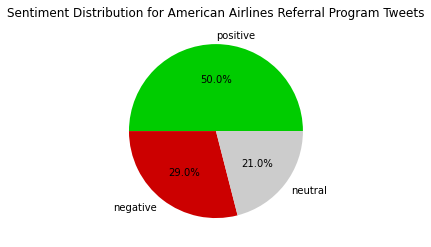

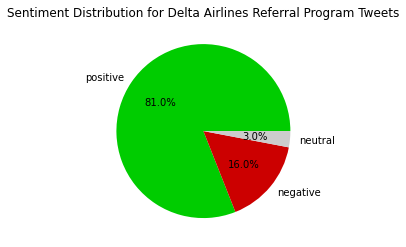

In [63]:
# Create a list of colors for the pie charts
colors = ['#00cc00', '#cc0000', '#cccccc']

# Create a function to plot the pie chart
def plot_pie_chart(df, airline_name):
    # Count the number of tweets for each sentiment category
    counts = df['Sentiment'].value_counts()

    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(f'Sentiment Distribution for {airline_name} Referral Program Tweets')

    # Show the plot
    plt.show()

# Plot the pie chart for American Airlines
plot_pie_chart(american_bonus, 'American Airlines')

# Plot the pie chart for Delta Airlines
plot_pie_chart(delta_bonus, 'Delta Airlines')


In [64]:
# Get the text from the 'Embedded_text' column of each DataFrame
american_bonus_text = ' '.join(american_bonus['Embedded_text'].tolist())
delta_bonus_text = ' '.join(delta_bonus['Embedded_text'].tolist())

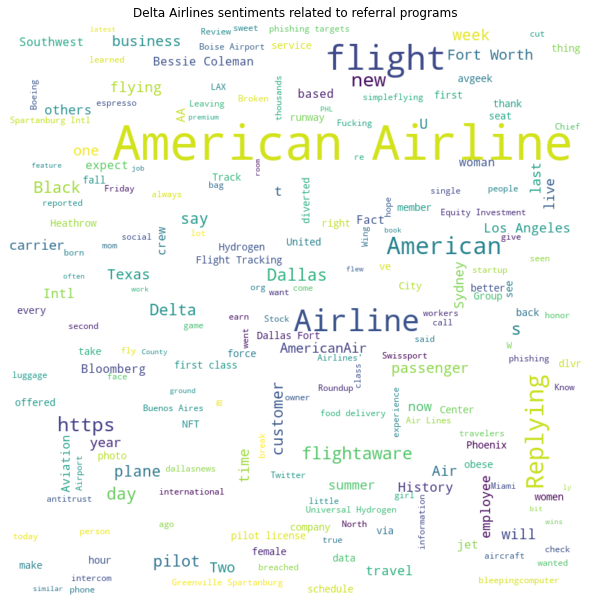

In [65]:
generate_wordcloud(american_bonus_text,'Delta Airlines sentiments related to referral programs')

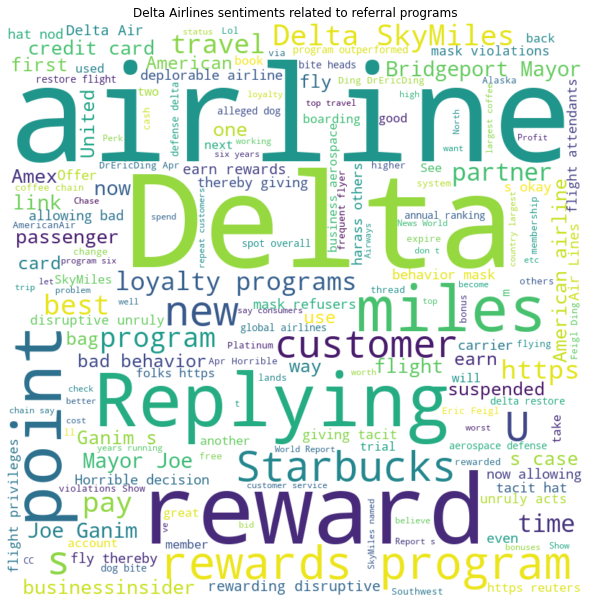

In [66]:
generate_wordcloud(delta_bonus_text,'Delta Airlines sentiments related to referral programs')

# Quarterly Profits for American and Delta Airlines

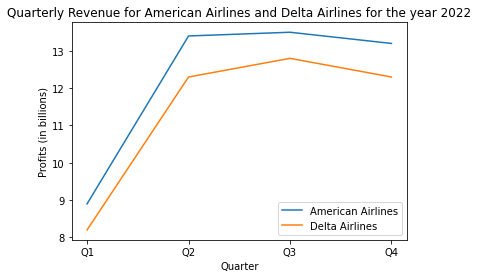

In [67]:
import matplotlib.pyplot as plt

# Quarterly profits for American Airlines
aa_profits = [8.9, 13.4, 13.5, 13.2]

# Quarterly profits for Delta Airlines
delta_profits = [8.2, 12.3, 12.8, 12.3]

# Define the x-axis labels
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# Plot the quarterly profits for American Airlines and Delta Airlines
plt.plot(quarters, aa_profits, label='American Airlines')
plt.plot(quarters, delta_profits, label='Delta Airlines')

# Add a title and axis labels
plt.title('Quarterly Revenue for American Airlines and Delta Airlines for the year 2022')
plt.xlabel('Quarter')
plt.ylabel('Profits (in billions)')

# Add a legend
plt.legend()

# Display the plot
plt.show()
